# PyTorch basics: syntax, torch.cuda and torch.autograd</b></h2>

<p style="align: center;"><img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png" width=400 height=100></p>

<h3 style="text-align: center;"><b>Intro</b></h3>

We will use PyTorch bacause it's been actively developed and supported by the community and [Facebook(Meta) Research](https://research.facebook.com/).

<h3 style="text-align: center;"><b>Installation</b></h3>

The detailed instruction on how to install PyTorch you can find on the [official PyTorch website](https://pytorch.org/).

In [2]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113


## Syntax

In [3]:
import torch

Some facts about PyTorch:  
- handy `torch.nn` and `torchvision` modules for fast neural network prototyping
- even faster than TensorFlow on some tasks
- allows to use GPU easily

At its core, PyTorch provides two main features:

- An n-dimensional Tensor, similar to numpy but can run on GPUs
- Automatic differentiation for building and training neural networks

If PyTorch was a formula, it would be:  

$$PyTorch = NumPy + CUDA + Autograd$$

(CUDA - [wiki](https://en.wikipedia.org/wiki/CUDA))

Let's see how we can use PyTorch to operate with vectors and tensors.  

Recall that **a tensor** is a multidimensional vector, e.g. :  

`x = np.array([1,2,3])` -- a vector = a tensor with 1 dimension (to be more precise: `(3,)`)  
`y = np.array([[1, 2, 3], [4, 5, 6]])` -- a matrix = a tensor with 2 dimensions (`(2, 3)` in this case)  
`z = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]],  
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]],  
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]]])` -- "a cube" (3, 3, 3) = a tensor with 3 dimensions (`(3, 3, 3)` in this case)

One real example of 3-dimensional tensor is **an image**, it has 3 dimensions: `height`, `width` and the `channel depth` (= 3 for color images, 1 for a greyscale). You can think of it as of parallelepiped consisting of the real numbers.

In PyTorch we will use `torch.Tensor` (`FloatTensor`, `IntTensor`, `ByteTensor`) for all the computations.

All tensor types:

In [ ]:
torch.HalfTensor      # 16 бит, floating point
torch.FloatTensor     # 32 бита, floating point
torch.DoubleTensor    # 64 бита, floating point

torch.ShortTensor     # 16 бит, integer, signed
torch.IntTensor       # 32 бита, integer, signed
torch.LongTensor      # 64 бита, integer, signed

torch.CharTensor      # 8 бит, integer, signed
torch.ByteTensor      # 8 бит, integer, unsigned

We will use only `torch.FloatTensor()` and `torch.IntTensor()`. 

* Создание тензора

In [4]:
a = torch.FloatTensor([1, 2])
print(a)
print(a.shape)
print(a.size())

tensor([1., 2.])
torch.Size([2])
torch.Size([2])


In [5]:
b = torch.FloatTensor([[1,2,3], [4,5,6]])
print(b)
print(b.shape)
print(b.shape[1])

tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.Size([2, 3])
3


In [6]:
x = torch.FloatTensor(2,3,4)
print(x)
print(x.size())

tensor([[[1.4199e-35, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]])
torch.Size([2, 3, 4])


In [7]:
x = torch.FloatTensor(100)
print(x)

tensor([5.5987e-36, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+

In [8]:
x = torch.IntTensor(45, 57, 14, 2)
print(x)
print(x.size())

tensor([[[[0, 0],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]],

         [[0, 0],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]],

         [[0, 0],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]],

         ...,

         [[0, 0],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]],

         [[0, 0],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]],

         [[0, 0],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]]],


        [[[0, 0],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]],

         [[0, 0],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
   

**Note:** при создании `torch.Tensor` память инициализируется случайным "мусором" 

In [11]:
torch.manual_seed(36)
x = torch.IntTensor(3, 2, 4)
x

tensor([[[  93781376,          0,         77,          0],
         [         0,          0,          0,          0]],

        [[         0,          0, 1953702523, 1937077345],
         [ 572537378,  740453231, 2019893792, 1953850213]],

        [[1601073001, 1853189987,  540680820,  572533813],
         [1919251317, 1886938463, 1936942450, 1936617321]]], dtype=torch.int32)

Заполняем тензор нулями

In [13]:
x1 = torch.FloatTensor(3, 2, 4)
x1.zero_()
x2 = torch.zeros(3, 2, 4)
x3 = torch.zeros_like(x1)

assert torch.allclose(x1, x2) and torch.allclose(x1, x3)
x1

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

- `zero_` делает inplace (все методы с подчеркиванием)
- `zeros` создает измененную копию (все методы без подчеркивания)

Заполнение нормальным распределением

In [14]:
x = torch.randn((2,3))                # Normal(0, 1) with shape
x

tensor([[ 0.4704, -0.0512,  0.6439],
        [ 0.2834, -1.9638,  0.3554]])

In [15]:
x.random_(0, 10)                      # discrete U[0, 10]

tensor([[6., 8., 7.],
        [3., 6., 0.]])

In [16]:
x.uniform_(0, 1)                      # U[0, 1]

tensor([[0.3356, 0.0986, 0.4914],
        [0.1489, 0.5055, 0.1309]])

In [17]:
x.normal_(mean=0, std=1)              # Normal with mean and std

tensor([[-0.5665, -0.9798,  0.5597],
        [ 1.8499,  1.5133, -0.3708]])

In [18]:
x.bernoulli_(p=0.5)                   # bernoulli with parameter p

tensor([[0., 1., 1.],
        [0., 1., 0.]])

## Numpy -> Torch

Все основные функции имеют схожий интерфейс с Numpy

https://github.com/torch/torch7/wiki/Torch-for-Numpy-users

`np.reshape()` == `torch.view()`:

In [19]:
b = torch.randn((2,3,4))  

In [21]:
b, b.stride()

(tensor([[[ 0.0662, -1.9158, -1.5929, -0.2520],
          [-0.1352, -0.4347,  0.2780, -0.9028],
          [-0.4080, -0.2848,  1.5458, -0.8396]],
 
         [[ 0.1080, -0.9379, -0.1158, -1.3567],
          [ 1.0567, -0.0647, -0.9778, -0.1802],
          [ 0.8648, -0.0227,  1.4191, -0.0573]]]), (12, 4, 1))

In [22]:
b.view(12, 2), b.view(12, 2).stride()  

(tensor([[ 0.0662, -1.9158],
         [-1.5929, -0.2520],
         [-0.1352, -0.4347],
         [ 0.2780, -0.9028],
         [-0.4080, -0.2848],
         [ 1.5458, -0.8396],
         [ 0.1080, -0.9379],
         [-0.1158, -1.3567],
         [ 1.0567, -0.0647],
         [-0.9778, -0.1802],
         [ 0.8648, -0.0227],
         [ 1.4191, -0.0573]]), (2, 1))

**Note:** `torch.view()` создает новый тензор

In [27]:
b.view(-1)

tensor([ 0.0662, -1.9158, -1.5929, -0.2520, -0.1352, -0.4347,  0.2780, -0.9028,
        -0.4080, -0.2848,  1.5458, -0.8396,  0.1080, -0.9379, -0.1158, -1.3567,
         1.0567, -0.0647, -0.9778, -0.1802,  0.8648, -0.0227,  1.4191, -0.0573])

In [24]:
b

tensor([[[ 0.0662, -1.9158, -1.5929, -0.2520],
         [-0.1352, -0.4347,  0.2780, -0.9028],
         [-0.4080, -0.2848,  1.5458, -0.8396]],

        [[ 0.1080, -0.9379, -0.1158, -1.3567],
         [ 1.0567, -0.0647, -0.9778, -0.1802],
         [ 0.8648, -0.0227,  1.4191, -0.0573]]])

In [25]:
b.reshape(-1) # if you need a copy use clone() if you need the same storage use view(). The semantics of reshape() are that it may or may not share the storage and you don't know beforehand.

tensor([ 0.0662, -1.9158, -1.5929, -0.2520, -0.1352, -0.4347,  0.2780, -0.9028,
        -0.4080, -0.2848,  1.5458, -0.8396,  0.1080, -0.9379, -0.1158, -1.3567,
         1.0567, -0.0647, -0.9778, -0.1802,  0.8648, -0.0227,  1.4191, -0.0573])

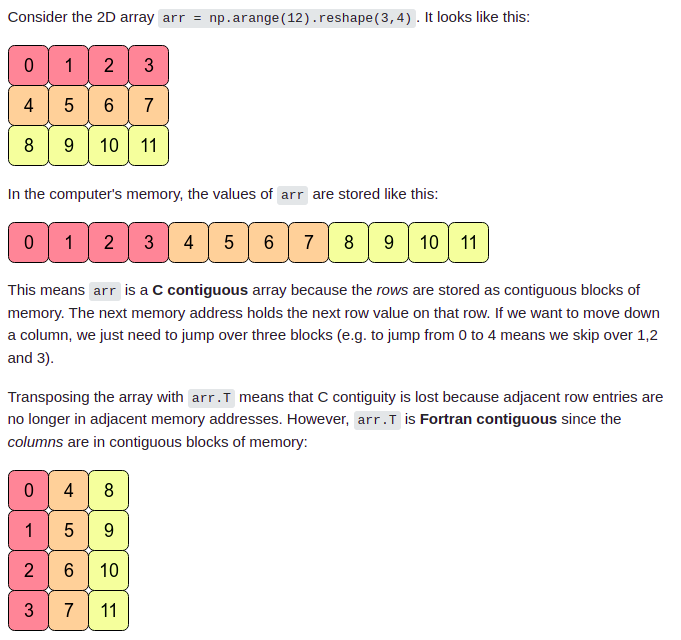

### Смена типа тензора:

In [31]:
a = torch.FloatTensor([1.9, 3.2, -7])

In [32]:
torch.IntTensor()

tensor([], dtype=torch.int32)

In [33]:
a.type_as(torch.IntTensor())

tensor([ 1,  3, -7], dtype=torch.int32)

In [34]:
a.to(torch.int32)

tensor([ 1,  3, -7], dtype=torch.int32)

In [35]:
a.type_as(torch.ByteTensor())

tensor([  1,   3, 249], dtype=torch.uint8)

In [38]:
a = a.to(torch.uint8)

In [39]:
a

tensor([  1,   3, 249], dtype=torch.uint8)

### Индексация совпадает с  `NumPy`:

In [40]:
a = torch.FloatTensor([[100, 20, 35], [15, 163, 534], [52, 90, 66]])
a

tensor([[100.,  20.,  35.],
        [ 15., 163., 534.],
        [ 52.,  90.,  66.]])

In [41]:
a[0, 0]

tensor(100.)

In [42]:
a[0:2, 1]

tensor([ 20., 163.])

### Арифметические операции:  

| Operator | Analogue |
|:-:|:-:|
|`+`| `torch.add()` |
|`-`| `torch.sub()` |
|`*`| `torch.mul()` |
|`/`| `torch.div()` |

In [43]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [44]:
a + b

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [45]:
a.add(b)

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [46]:
b = -a
b

tensor([[  -1.,   -2.,   -3.],
        [ -10.,  -20.,  -30.],
        [-100., -200., -300.]])

In [47]:
a + b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [48]:
a - b

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

In [49]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [50]:
a.sub(b) # copy

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

In [51]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [52]:
a.sub_(b) # inplace

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

In [53]:
a

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

In [54]:
a * b

tensor([[-2.0000e+00, -8.0000e+00, -1.8000e+01],
        [-2.0000e+02, -8.0000e+02, -1.8000e+03],
        [-2.0000e+04, -8.0000e+04, -1.8000e+05]])

In [55]:
a.mul(b)

tensor([[-2.0000e+00, -8.0000e+00, -1.8000e+01],
        [-2.0000e+02, -8.0000e+02, -1.8000e+03],
        [-2.0000e+04, -8.0000e+04, -1.8000e+05]])

In [56]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [57]:
a / b

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

In [58]:
a.div(b)

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

### Сравнение:

In [59]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [60]:
a == b

tensor([[False, False, False],
        [False, False, False],
        [ True,  True,  True]])

In [61]:
a != b

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

In [62]:
a < b

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])

In [63]:
a > b

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

### Функции

In [64]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])

In [65]:
a.sin()

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [66]:
torch.sin(a)

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [67]:
import numpy as np

In [68]:
np.sin(a)

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [69]:
a.log()

tensor([[0.0000, 0.6931, 1.0986],
        [2.3026, 2.9957, 3.4012],
        [4.6052, 5.2983, 5.7038]])

### The sum, mean, max, min:

In [70]:
a.sum(dim=1) # вместо axis используем dim

tensor([  6.,  60., 600.])

In [71]:
torch.sum(a, dim=1)

tensor([  6.,  60., 600.])

In [72]:
np.sum(a.numpy(), axis=1)

array([  6.,  60., 600.], dtype=float32)

In [73]:
a.mean()

tensor(74.)

In [74]:
torch.max(a, dim = 1)

torch.return_types.max(
values=tensor([  3.,  30., 300.]),
indices=tensor([2, 2, 2]))

In [ ]:
a

In [77]:
?torch.min

In [76]:
a.min(dim=1)

torch.return_types.min(
values=tensor([  1.,  10., 100.]),
indices=tensor([0, 0, 0]))

In [75]:
a.min()

tensor(1.)

## Matrix operations:

### Transpose a tensor:

In [78]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [79]:
a.numpy().T

array([[  1.,  10., 100.],
       [  2.,  20., 200.],
       [  3.,  30., 300.]], dtype=float32)

In [80]:
a.t_()

tensor([[  1.,  10., 100.],
        [  2.,  20., 200.],
        [  3.,  30., 300.]])

In [81]:
a

tensor([[  1.,  10., 100.],
        [  2.,  20., 200.],
        [  3.,  30., 300.]])

In [82]:
a.T

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [83]:
a

tensor([[  1.,  10., 100.],
        [  2.,  20., 200.],
        [  3.,  30., 300.]])

### Dot product of vectors:

In [84]:
a = torch.FloatTensor([1, 2, 3, 4, 5, 6])
b = torch.FloatTensor([-1, -2, -4, -6, -8, -10])

In [85]:
a.dot(b)

tensor(-141.)

In [86]:
a @ b

tensor(-141.)

In [87]:
a.shape, b.shape

(torch.Size([6]), torch.Size([6]))

In [88]:
a @ b

tensor(-141.)

In [89]:
type(a)

torch.Tensor

In [90]:
type(b)

torch.Tensor

In [91]:
type(a @ b)

torch.Tensor

### Matrix product:

In [92]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [93]:
a * b

tensor([[-1.0000e+00, -4.0000e+00, -9.0000e+00],
        [-1.0000e+02, -4.0000e+02, -9.0000e+02],
        [ 1.0000e+04,  4.0000e+04,  9.0000e+04]])

In [94]:
a.mm(b)

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

In [95]:
a @ b

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

Remain unchanged:

In [96]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [97]:
b

tensor([[ -1.,  -2.,  -3.],
        [-10., -20., -30.],
        [100., 200., 300.]])

In [98]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1], [-10], [100]])

In [99]:
print(a.shape, b.shape)

torch.Size([3, 3]) torch.Size([3, 1])


In [100]:
a @ b

tensor([[  279.],
        [ 2790.],
        [27900.]])

If we unroll the tensor `b` in an array (`torch.view(-1)`) the multiplication would be like with the column:

In [101]:
b

tensor([[ -1.],
        [-10.],
        [100.]])

In [102]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [103]:
b.view(-1)

tensor([ -1., -10., 100.])

In [104]:
b.view(-1).shape

torch.Size([3])

In [105]:
a @ b.view(-1)

tensor([  279.,  2790., 27900.])

In [106]:
a @ b

tensor([[  279.],
        [ 2790.],
        [27900.]])

In [107]:
a.mv(b.view(-1))

tensor([  279.,  2790., 27900.])

In [108]:
y = torch.Tensor(2, 3, 4, 5)
z = torch.Tensor(2, 3, 5, 6)
(y @ z).shape

torch.Size([2, 3, 4, 6])

**From NumPu to PyTorch conversion**:

In [109]:
import numpy as np

a = np.random.rand(3, 3)
a

array([[0.04120841, 0.19469094, 0.17225401],
       [0.24892218, 0.4885623 , 0.64389591],
       [0.20380294, 0.09815203, 0.50704867]])

In [110]:
b = torch.from_numpy(a)
b

tensor([[0.0412, 0.1947, 0.1723],
        [0.2489, 0.4886, 0.6439],
        [0.2038, 0.0982, 0.5070]], dtype=torch.float64)

**NOTE!** `a` and `b` have the same data storage, so the changes in one tensor will lead to the changes in another:

In [111]:
b -= b
b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [112]:
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

**From PyTorch to NumPy conversion:**

In [113]:
a = torch.FloatTensor(2, 3, 4)
a

tensor([[[1.6540e-35, 0.0000e+00, 1.0930e-43, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 5.6812e+00, 7.7052e+31, 1.9447e+31]],

        [[2.1715e-18, 2.3081e-12, 1.8590e+34, 7.7767e+31],
         [1.7181e+19, 1.8990e+28, 1.5766e-19, 1.4587e-19],
         [7.1856e+22, 1.8609e+34, 1.8179e+31, 1.8524e+28]]])

In [114]:
type(a)

torch.Tensor

In [115]:
x = a.numpy()
x

array([[[1.6540308e-35, 0.0000000e+00, 1.0930128e-43, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 5.6811523e+00, 7.7052459e+31, 1.9446917e+31]],

       [[2.1714819e-18, 2.3081222e-12, 1.8589502e+34, 7.7766644e+31],
        [1.7181067e+19, 1.8989621e+28, 1.5766212e-19, 1.4586577e-19],
        [7.1855986e+22, 1.8608935e+34, 1.8178666e+31, 1.8523599e+28]]],
      dtype=float32)

In [116]:
x.shape

(2, 3, 4)

In [117]:
type(x)

numpy.ndarray

In [118]:
x -= x

In [119]:
x

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]], dtype=float32)

Let's write the `forward_pass(X, w)` for a single neuron (activation = sigmoid) using PyTorch:

In [120]:
def forward_pass(X, w):
    return torch.sigmoid(X @ w)

In [121]:
X = torch.FloatTensor([[-5, 5], [2, 3], [1, -1]])
w = torch.FloatTensor([[-0.5], [2.5]])
result = forward_pass(X, w)
print('result: {}'.format(result))

result: tensor([[1.0000],
        [0.9985],
        [0.0474]])


## <h1 style="text-align: center;"><a href="https://ru.wikipedia.org/wiki/CUDA">CUDA</a></h3>

[CUDA documentation](https://docs.nvidia.com/cuda/)

We can use both CPU (Central Processing Unit) and GPU (Graphical Processing Unit) to make the computations with PyTorch. We can switch between them easily, this is one of the most important things in PyTorch framework.

In [122]:
x = torch.FloatTensor(1024, 10024).uniform_()
x

tensor([[0.4215, 0.5876, 0.2142,  ..., 0.7891, 0.9344, 0.5486],
        [0.5081, 0.7088, 0.9067,  ..., 0.7406, 0.0250, 0.7460],
        [0.3779, 0.0515, 0.3002,  ..., 0.1536, 0.7512, 0.7091],
        ...,
        [0.9887, 0.0808, 0.0118,  ..., 0.4304, 0.3085, 0.4407],
        [0.0041, 0.8109, 0.5269,  ..., 0.2066, 0.7033, 0.1817],
        [0.5106, 0.0499, 0.7163,  ..., 0.1671, 0.5632, 0.4750]])

In [123]:
x.is_cuda

False

Place a tensor on GPU (GPU memory is used):

In [124]:
!nvidia-smi

Tue Sep 13 12:01:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [125]:
x = x.cuda()

In [126]:
x

tensor([[0.4215, 0.5876, 0.2142,  ..., 0.7891, 0.9344, 0.5486],
        [0.5081, 0.7088, 0.9067,  ..., 0.7406, 0.0250, 0.7460],
        [0.3779, 0.0515, 0.3002,  ..., 0.1536, 0.7512, 0.7091],
        ...,
        [0.9887, 0.0808, 0.0118,  ..., 0.4304, 0.3085, 0.4407],
        [0.0041, 0.8109, 0.5269,  ..., 0.2066, 0.7033, 0.1817],
        [0.5106, 0.0499, 0.7163,  ..., 0.1671, 0.5632, 0.4750]],
       device='cuda:0')

In [127]:
!nvidia-smi

Tue Sep 13 12:03:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    27W /  70W |    650MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [128]:
x = x.cpu()
!nvidia-smi

Tue Sep 13 12:03:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    27W /  70W |    650MiB / 15109MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [129]:
torch.cuda.empty_cache()
!nvidia-smi

Tue Sep 13 12:03:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    28W /  70W |    648MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [131]:
device = torch.device("cuda")
x = x.to(device)
x

tensor([[0.4215, 0.5876, 0.2142,  ..., 0.7891, 0.9344, 0.5486],
        [0.5081, 0.7088, 0.9067,  ..., 0.7406, 0.0250, 0.7460],
        [0.3779, 0.0515, 0.3002,  ..., 0.1536, 0.7512, 0.7091],
        ...,
        [0.9887, 0.0808, 0.0118,  ..., 0.4304, 0.3085, 0.4407],
        [0.0041, 0.8109, 0.5269,  ..., 0.2066, 0.7033, 0.1817],
        [0.5106, 0.0499, 0.7163,  ..., 0.1671, 0.5632, 0.4750]],
       device='cuda:0')

Let's multiply two tensors on GPU and then move the result on the CPU:

In [132]:
a = torch.FloatTensor(10000, 10000).uniform_()
b = torch.FloatTensor(10000, 10000).uniform_()
c = a.cuda().mul(b.cuda()).cpu()

In [133]:
c

tensor([[0.1530, 0.0822, 0.1557,  ..., 0.1781, 0.3434, 0.0129],
        [0.0138, 0.1311, 0.2493,  ..., 0.2459, 0.2164, 0.1307],
        [0.0734, 0.7000, 0.2162,  ..., 0.2232, 0.0057, 0.9057],
        ...,
        [0.5393, 0.4551, 0.0632,  ..., 0.2191, 0.0263, 0.2351],
        [0.2883, 0.1342, 0.0110,  ..., 0.2939, 0.0207, 0.4907],
        [0.0987, 0.7009, 0.2719,  ..., 0.1720, 0.0867, 0.0515]])

In [135]:
a = a.cuda()

In [136]:
a

tensor([[0.2685, 0.3025, 0.3997,  ..., 0.4709, 0.9456, 0.0486],
        [0.0474, 0.2758, 0.5916,  ..., 0.5835, 0.4857, 0.9044],
        [0.9005, 0.9062, 0.7137,  ..., 0.2291, 0.0165, 0.9155],
        ...,
        [0.9757, 0.8681, 0.7305,  ..., 0.7353, 0.2471, 0.9675],
        [0.9113, 0.1886, 0.0202,  ..., 0.9277, 0.1179, 0.8400],
        [0.1791, 0.7569, 0.6261,  ..., 0.5611, 0.8739, 0.3718]],
       device='cuda:0')

Tensors placed on CPU and tensors placed on GPU are unavailable for each other:

In [137]:
a = torch.FloatTensor(10000, 10000).uniform_().cpu()
b = torch.FloatTensor(10000, 10000).uniform_().cuda()

In [138]:
a + b

RuntimeError: ignored

Example of working with GPU:

In [139]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [140]:
x = torch.FloatTensor(5, 5, 5).uniform_()

# check for CUDA availability (NVIDIA GPU)
if torch.cuda.is_available():
    # get the CUDA device name
    device = torch.device('cuda')          # CUDA-device object
    y = torch.ones_like(x, device=device)  # create a tensor on GPU
    x = x.to(device)                       # or just `.to("cuda")`
    z = x + y
    print(z)
    # you can set the type while `.to` operation
    print(z.to("cpu", torch.double))

tensor([[[1.9041, 1.0467, 1.0999, 1.7717, 1.4092],
         [1.5692, 1.8459, 1.1768, 1.6705, 1.3444],
         [1.3189, 1.7763, 1.8956, 1.6213, 1.2701],
         [1.5975, 1.6111, 1.2644, 1.7524, 1.5502],
         [1.7114, 1.9626, 1.1967, 1.3338, 1.6670]],

        [[1.9429, 1.4079, 1.3084, 1.4894, 1.6923],
         [1.9281, 1.2093, 1.7472, 1.3084, 1.6117],
         [1.3463, 1.1221, 1.7424, 1.7119, 1.6732],
         [1.5588, 1.6748, 1.8311, 1.9743, 1.1687],
         [1.0549, 1.0188, 1.4221, 1.3831, 1.5490]],

        [[1.6685, 1.8376, 1.2763, 1.1190, 1.5103],
         [1.5395, 1.7664, 1.5495, 1.3951, 1.2342],
         [1.3121, 1.8216, 1.8704, 1.2513, 1.1587],
         [1.8047, 1.9061, 1.7093, 1.5740, 1.6135],
         [1.6417, 1.1884, 1.4108, 1.6125, 1.7243]],

        [[1.0151, 1.5580, 1.6814, 1.4767, 1.1198],
         [1.1922, 1.8604, 1.5145, 1.2782, 1.6034],
         [1.6111, 1.8801, 1.6789, 1.2033, 1.4483],
         [1.4281, 1.3631, 1.3241, 1.0069, 1.1362],
         [1.2156, 1.9835,

### Automatic differenciation

PyTorch позволяет динамически создавать граф вычислений, который может эффективно исполняться на GPUs.

In [141]:
# chose device automaticaly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Для переменных мы можем указать следует ли для неё вычислять градиент, используя флаг `requires_grad`.

In [142]:
param = torch.rand(2, requires_grad=True)
data = torch.rand(2, requires_grad=False)
print(param, data)

tensor([0.4864, 0.9202], requires_grad=True) tensor([0.2804, 0.5416])


In [143]:
# we can compute gradient only for floats and complex types
data_long = torch.tensor([1], requires_grad=True)

RuntimeError: ignored

In [144]:
# set requires grad

data.requires_grad_(True)

print(f"The var data with required grad - {data}")

data.requires_grad_(False)

print(f"The var data without required grad - {data}")

The var data with required grad - tensor([0.2804, 0.5416], requires_grad=True)
The var data without required grad - tensor([0.2804, 0.5416])


Рассмотрим, как вычислить производные с помощью PyTorch на примере функции.


$$
f(\mathbf{x}) = ||  A \mathbf{x}  + b - \mathbf{y} ||_2^2
$$

$$
 \frac{\partial f}{\partial \mathbf{b}} = 2 (A \mathbf{x}  + b - \mathbf{y})
$$

$$
 \frac{\partial f}{\partial \mathbf{x}} = 2 (A \mathbf{x}  + b - \mathbf{y}) A
$$

$$
 \frac{\partial f}{\partial \mathbf{A}} = 2 (A \mathbf{x}  + b - \mathbf{y})x^\top
$$



In [145]:
def f(x, y, A, b): 
  return torch.norm((A @ x + b - y ), p=2)**2

def dfdb(x, y, A, b):
  return 2 * (A @ x + b - y )

def dfdx(x, y, A, b):
  return 2 * (A @ x + b - y ) @ A

def dfda(x, y, A, b):
  return torch.outer(2 * (A @ x + b - y), x)


In [188]:
# variables

x = torch.rand(3, requires_grad=True)
y = torch.rand(3, requires_grad=True)
b = torch.rand(3, requires_grad=True)
A = torch.rand((3, 3), requires_grad=True)

In [147]:
# want to turn of any grad related computations

with torch.no_grad():
  val = f(x, y, A, b)
  d_b = dfdb(x, y, A, b)
  d_x = dfdx(x, y, A, b)
  d_a = dfda(x, y, A, b)

In [189]:
# what if we try to compute backward when we turn of grad computations

with torch.no_grad():
  val = f(x, y, A, b)

val.backward()

RuntimeError: ignored

In [190]:
val = f(x, y, A, b)
val.backward()

In [150]:
for v, g in zip([x, A, b], [d_x, d_a, d_b]):
  print(torch.norm(v.grad - g))

tensor(0.)
tensor(0.)
tensor(0.)


In [151]:
# can we call backward twice?

val.backward()

RuntimeError: ignored

In [191]:
# what if we do we same thing again?
val = f(x, y, A, b)
val.backward()

In [155]:
for v, g in zip([x, A, b], [d_x, d_a, d_b]):
  print(f"The diff between the autograd and the analytical one \t {torch.norm(v.grad - g)}")
  print(f"Has it been doubled \t {torch.norm(v.grad - 2*g) < 1e-8}")

The diff between the autograd and the analytical one 	 4.593559265136719
Has it been doubled 	 False
The diff between the autograd and the analytical one 	 3.237139940261841
Has it been doubled 	 False
The diff between the autograd and the analytical one 	 3.489131212234497
Has it been doubled 	 False


In [156]:
def set_zero_grad(vars):
  for var in vars:
    if var.grad is not None:
      var.grad.zero_()

In [157]:
set_zero_grad([A, b, x, y])

In [158]:
val = f(x, y, A, b)
val.backward()

for v, g in zip([x, A, b], [d_x, d_a, d_b]):
  print(torch.norm(v.grad - g))


tensor(0.)
tensor(0.)
tensor(0.)


### Custom gradient

Что, если нам хочется релизовать кастомный градиент для произвольной функции. 

Зачем?

 - Мы можем знать лучший способ посчитать градиент, чем делаль бэкпроп для суперпозиции элементарных функций
 - Можем реализовать численно более устойчивый метод
 - Можем использовать функции из внешних библиотек

Рассмотрим сигмоиду:

$$ 
  \sigma(x) = \frac{1}{1+e^{-x}}
$$

Если честно распишем суперпозицию функций, то получим:

$$
  \sigma(x) = f_1 \odot f_2  \odot f_3 \odot f_4(x), where 
$$

$$
f_1 = \frac{1}{u}, f_2 = 1 + u, f_3 = \exp(u), f_4 = -u
$$

Тогда:

$$
\frac{\partial \sigma}{\partial x} = \frac{\partial \sigma}{\partial f_2}\frac{\partial f_2}{\partial f_3}
\frac{\partial f_3}{\partial f_4}
\frac{\partial f_4}{\partial x}
$$

Но зная как устроена производная можно упростить:

$$
\frac{\partial \sigma}{\partial x} = \sigma(x)(1 - \sigma(x))
$$

Вручную задать градиени функции в библиотеке PyTorch можно создав дочерний класс от `torch.autograd.Function`.

In [159]:
class MySigmoid(torch.autograd.Function):
  @staticmethod
  def forward(ctx, x):
    val = 1/(1 + torch.exp(-x))
    ctx.val = val
    return val

  @staticmethod
  def backward(ctx, grad_output):
    val = ctx.val
    return grad_output*val*(1-val)

In [160]:
# the function that compare the numerical and the analytical gradient
from torch.autograd import gradcheck

In [161]:
sigmoid = MySigmoid.apply
x = torch.rand(2, requires_grad=True)
print(gradcheck(sigmoid, x, eps=1e-4, atol=1e-3))

# be sure to use double for better approximation
x = torch.rand(2, requires_grad=True).double()
print(gradcheck(sigmoid, x, eps=1e-6, atol=1e-4))

True
True


/usr/local/lib/python3.7/dist-packages/torch/autograd/gradcheck.py:653: UserWarning: Input #0 requires gradient and is not a double precision floating point or complex. This check will likely fail if all the inputs are not of double precision floating point or complex. 
  f'Input #{idx} requires gradient and '


In [162]:
def sum_sigmoid(x):
  return torch.sum(sigmoid(x))

PyTorch умеет считать матрицу Якоби или матрицу Гессе для заданной функции.

In [163]:
from torch.autograd.functional import hessian, jacobian

In [164]:
jacobian(sigmoid, x)

tensor([[0.2493, 0.0000],
        [0.0000, 0.2179]], dtype=torch.float64)

In [186]:
hessian(sum_sigmoid, x)

tensor([[ 0.0409,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0429,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0450,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ..., -0.0450,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, -0.0429,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000, -0.0409]],
       dtype=torch.float64)

### Нелинейная регрессия

Модель данных:
$$
t = x^4 + 10x^2 + 1-x + \varepsilon, \varepsilon \sim \mathcal{N} (0, 5)
$$ 

In [166]:
from matplotlib import pyplot as plt
import numpy as np

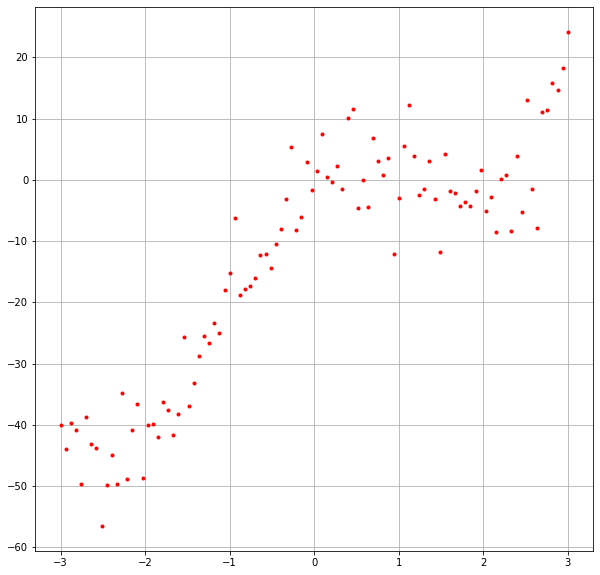

In [167]:
#generate data
N = 100 
x = np.linspace(-3, 3, N) 
t = x**4 - 10*x**2 + 10 * x + np.random.normal(size=N, scale=5)
plt.figure(figsize=(10, 10))
plt.plot(x, t, "r.")
plt.grid()
plt.show()

t = torch.from_numpy(t)
x = torch.from_numpy(x)

In [168]:
degree = 5

def model(x, params):
  out = None
  for i, param in enumerate(params):
    if out is None:
      out = param*x**i
    else:
      out += param*x**i
  return out

In [169]:
params = torch.zeros(degree, requires_grad=True)

In [170]:
def cost(params):
    y = model(x, params)
    return (1.0 / N) * torch.sum((y - t) ** 2)

In [182]:
params.grad = torch.FloatTensor(5)

In [184]:
num_epochs = 1000
learning_rate = 0.0001


for i in range(num_epochs):
    loss = cost(params)
    loss.backward()
  
    if i % 100 == 0:
        print(f"i: {i:<5d} loss: {loss.item():.4f}")
    with torch.no_grad():
      params -= learning_rate * params.grad
      params.grad.zero_()
      # update values


print(params)
w = params.detach().cpu().numpy()

i: 0     loss: 969469566.6418
i: 100   loss: 925360375.6582
i: 200   loss: 884070321.6788
i: 300   loss: 845408169.1375
i: 400   loss: 809197339.0230
i: 500   loss: 775271213.7064
i: 600   loss: 743475784.0018
i: 700   loss: 713667597.9002
i: 800   loss: 685712873.0302
i: 900   loss: 659485807.5949
tensor([-4.0499e+04,  2.6661e+00,  9.5132e+03,  1.0963e+00, -4.6462e+02],
       requires_grad=True)


In [172]:
y = model(x, params).detach()

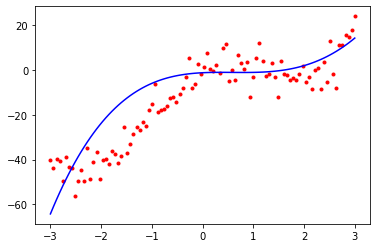

In [173]:
plt.plot(x, t, "r.")
plt.plot(x, y, "b-")

<h3 style="text-align: center;">Further reading:<b></b></h3>

*1). Official PyTorch tutorials: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py*

*2). arXiv article about the deep learning frameworks comparison: https://arxiv.org/pdf/1511.06435.pdf*

*3). Useful repo with different tutorials: https://github.com/yunjey/pytorch-tutorial*

*4). Facebook AI Research (main contributor of PyTorch) website: https://facebook.ai/developers/tools*